In [ ]:
from google.colab import files

# Upload multiple files
uploaded = files.upload()


Saving categories (1).csv to categories (1) (1).csv
Saving customers_20000 (1).csv to customers_20000 (1) (1).csv
Saving order_items.csv to order_items (1).csv
Saving orders_12000.csv to orders_12000 (1).csv
Saving payments.csv to payments (1).csv
Saving products_1500_mousefix.csv to products_1500_mousefix (1).csv
Saving refunds.csv to refunds (1).csv
Saving returns (1).csv to returns (1) (1).csv
Saving shipments.csv to shipments (1).csv
Saving suppliers.csv to suppliers (1).csv


import pandas as pd

customers = pd.read_csv("customers_20000 (1).csv")
orders = pd.read_csv("orders_12000.csv")
payments = pd.read_csv("payments.csv")
products = pd.read_csv("products_1500_mousefix.csv")
refunds = pd.read_csv("refunds.csv")
returns = pd.read_csv("returns (1).csv")
categories = pd.read_csv("categories (1).csv")
order_items = pd.read_csv("order_items.csv")
shipments = pd.read_csv("shipments.csv")
suppliers = pd.read_csv("suppliers.csv")

In [ ]:
import pandas as pd

customers = pd.read_csv("customers_20000 (1).csv")
orders = pd.read_csv("orders_12000.csv")
payments = pd.read_csv("payments.csv")
products = pd.read_csv("products_1500_mousefix.csv")
refunds = pd.read_csv("refunds.csv")
returns = pd.read_csv("returns (1).csv")
categories = pd.read_csv("categories (1).csv")
order_items = pd.read_csv("order_items.csv")
shipments = pd.read_csv("shipments.csv")
suppliers = pd.read_csv("suppliers.csv")

In [ ]:
# 1. Preview first 5 customers
print(customers.head())

   customer_id customer_code first_name last_name  gender  \
0            1    CUST-00001        Sai    Sharma    Male   
1            2    CUST-00002      Aarav      Khan  Female   
2            3    CUST-00003       Riya     Reddy    Male   
3            4    CUST-00004        Dev       Das   Other   
4            5    CUST-00005       Anvi      Iyer    Male   

                               email           phone        city state  \
0  sai.sharma.cust-00001@example.com  +91-8321819600       Noida    UP   
1  aarav.khan.cust-00002@example.com  +91-7423511615  Coimbatore    TN   
2  riya.reddy.cust-00003@example.com  +91-9341316475      Nagpur    MH   
3     dev.das.cust-00004@example.com  +91-8503056413       Noida    UP   
4   anvi.iyer.cust-00005@example.com  +91-6965328710      Kanpur    UP   

  country  postal_code  birth_date            signup_at   segment  is_active  \
0   India       963794  1979-08-13  2023-06-22 22:43:23  Standard      False   
1   India       718495  1983

In [7]:


# 2. Filter: customers from Pune
customers_pune = customers[customers["city"] == "Pune"]
print("Customers from Pune:\n", customers_pune.head())


Customers from Pune:
      customer_id customer_code first_name last_name  gender  \
14            15    CUST-00015      Manan      Iyer    Male   
20            21    CUST-00021    Krishna    Sharma  Female   
73            74    CUST-00074      Ayaan    Pillai  Female   
96            97    CUST-00097       Anvi     Reddy  Female   
120          121    CUST-00121       Diya     Reddy  Female   

                                     email           phone  city state  \
14       manan.iyer.cust-00015@example.com  +91-9524278680  Pune    MH   
20   krishna.sharma.cust-00021@example.com  +91-8791769367  Pune    MH   
73     ayaan.pillai.cust-00074@example.com  +91-8755719285  Pune    MH   
96       anvi.reddy.cust-00097@example.com  +91-8843959953  Pune    MH   
120      diya.reddy.cust-00121@example.com  +91-7849825449  Pune    MH   

    country  postal_code  birth_date            signup_at   segment  \
14    India       698262  1966-10-01  2023-12-06 15:24:52  Platinum   
20    India 

In [8]:
# 3. Sort: top 10 most expensive products
top_products = products.sort_values("unit_price", ascending=False).head(10)[
    ["product_id", "product_name", "category", "brand", "unit_price"]
]
print("Top Products:\n", top_products)


Top Products:
       product_id                product_name   category   brand  unit_price
518          519    Dell Max Laptop 64GB/1TB  Computers    Dell    135000.0
452          453   Apple Max Laptop 32GB/2TB  Computers   Apple    114180.0
1034        1035      Dell S Laptop 32GB/1TB  Computers    Dell    111500.0
575          576  Lenovo S Laptop 16GB/256GB  Computers  Lenovo    108730.0
525          526    Dell Pro Laptop 16GB/4TB  Computers    Dell    102640.0
1397        1398   Dell Prime Laptop 8GB/4TB  Computers    Dell    102470.0
1020        1021    Acer Lite Laptop 8GB/2TB  Computers    Acer    100840.0
1201        1202    Dell Max Laptop 64GB/4TB  Computers    Dell     99750.0
959          960    Dell Mini Laptop 8GB/2TB  Computers    Dell     96500.0
343          344   Acer Max Laptop 8GB/256GB  Computers    Acer     94810.0


In [13]:
# 4. Groupby: total payment amount by method
payment_totals = (
    payments.groupby("method")["amount"]
    .sum()
    .reset_index()
    .sort_values("amount", ascending=False)
    )
#print("Payment Totals by Method:\n", payment_totals)

payment_totals["amount"] = payment_totals["amount"].round(2)  # optional rounding
payment_totals["amount_str"] = payment_totals["amount"].map(lambda x: f"{x:,.2f}")
print(payment_totals)

       method        amount      amount_str
3         UPI  2.268688e+08  226,868,771.63
1        Card  2.112442e+08  211,244,221.84
0         COD  2.088999e+08  208,899,918.77
2  NetBanking  2.074141e+08  207,414,093.95


In [11]:
# 5. Groupby with Join: average order value by order status
orders = orders.rename(columns={"status": "order_status"})
payments = payments.rename(columns={"status": "payment_status"})

orders_payments = pd.merge(orders, payments, on="order_id", how="inner")

avg_order_value = (
    orders_payments.groupby("order_status")["amount"]
    .mean()
    .reset_index()
    .rename(columns={"amount": "avg_amount"})
)
print("Average Order Value by Order Status:\n", avg_order_value)

Average Order Value by Order Status:
   order_status    avg_amount
0    Cancelled  42593.976835
1    Delivered  74037.093752
2         Paid  73595.873485
3      Pending  45345.185776
4      Shipped  75598.044591


In [19]:
date_cols = ["order_date", "created_at", "date", "order_datetime"]
order_date_col = next((c for c in date_cols if c in orders.columns), None)



payments_agg = (
    payments.groupby("order_id", as_index=False)
    .agg(total_paid=("amount", "sum"))
)

orders_with_payments = orders.merge(payments_agg, on="order_id", how="left")

if order_date_col:
    orders_with_payments[order_date_col] = pd.to_datetime(orders_with_payments[order_date_col], errors="coerce")

orders_customers = orders_with_payments.merge(
customers[["customer_id", "first_name", "last_name", "email", "city"]],
on="customer_id",
how="left"
)


In [20]:
customer_summary = (
    orders_customers
    .groupby("customer_id", as_index=False)
    .agg(
        first_name = ("first_name", "first"),
        last_name  = ("last_name", "first"),
        email      = ("email", "first"),
        city       = ("city", "first"),
        total_spend = ("total_paid", "sum"),                 # lifetime spend (sum of payments linked to their orders)
        num_orders  = ("order_id", "nunique"),               # number of distinct orders
        avg_order_value = ("total_paid", "mean"),           # avg payment per order
        last_order_date = (order_date_col, "max") if order_date_col else ("order_id", "max")
    )
)

In [21]:
# Fill NaN totals with 0
customer_summary["total_spend"] = customer_summary["total_spend"].fillna(0)
customer_summary["avg_order_value"] = customer_summary["avg_order_value"].fillna(0)


In [22]:
customer_summary["full_name"] = customer_summary["first_name"].fillna("") + " " + customer_summary["last_name"].fillna("")
customer_summary = customer_summary.sort_values("total_spend", ascending=False)


In [23]:
# --- 6. Top 10 customers by lifetime spend ---
top10_customers = customer_summary.head(10).copy()


top10_customers["total_spend"] = top10_customers["total_spend"].round(2)
top10_customers["avg_order_value"] = top10_customers["avg_order_value"].round(2)

# Reorder columns
cols = ["customer_id", "full_name", "email", "city", "num_orders", "total_spend", "avg_order_value", "last_order_date"]
top10_customers = top10_customers[cols]

# --- 7. Output results ---
print("Top 10 customers by lifetime spend:")
print(top10_customers.to_string(index=False))


Top 10 customers by lifetime spend:
 customer_id       full_name                                  email       city  num_orders  total_spend  avg_order_value     last_order_date
       15426    Vihaan Singh    vihaan.singh.cust-15426@example.com     Nagpur           2    699892.22        349946.11 2025-08-08 07:37:35
        2274 Aaradhya Chopra aaradhya.chopra.cust-02274@example.com  Bengaluru           4    672508.20        168127.05 2025-01-02 20:32:15
       17713 Shrishti Sharma shrishti.sharma.cust-17713@example.com     Howrah           4    671775.30        167943.82 2025-08-02 22:03:22
       18653      Anvi Verma      anvi.verma.cust-18653@example.com      Noida           4    656314.29        164078.57 2025-02-21 14:57:11
       16567   Krishna Verma   krishna.verma.cust-16567@example.com      Delhi           2    644908.94        322454.47 2025-04-23 02:55:13
       18506        Pari Das        pari.das.cust-18506@example.com     Jaipur           3    625538.53        208512.

In [24]:
orders = orders.rename(columns={"status": "order_status"})
payments = payments.rename(columns={"status": "payment_status"})

# --- 3. Aggregate payments (gross spend) ---
payments_agg = (
    payments.groupby("order_id", as_index=False)
    .agg(total_paid=("amount", "sum"))
)

# --- 4. Aggregate refunds ---
refunds_agg = (
    refunds.groupby("order_id", as_index=False)
    .agg(total_refund=("refund_amount", "sum"))
)


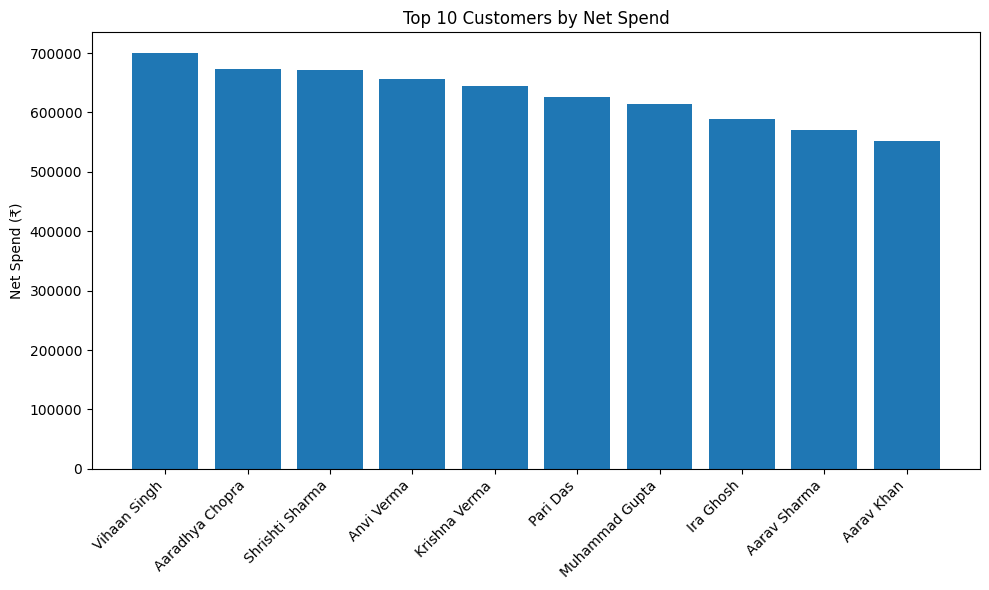

In [26]:
# --- 6. Join orders + payments + refunds ---
orders_with_money = (
    orders
    .merge(payments_agg, on="order_id", how="left")
    .merge(refunds_agg, on="order_id", how="left")
)

# Replace NaN with 0
orders_with_money[["total_paid", "total_refund"]] = orders_with_money[["total_paid", "total_refund"]].fillna(0)

# Compute net paid
orders_with_money["net_paid"] = orders_with_money["total_paid"] - orders_with_money["total_refund"]

# --- 7. Join customers ---
orders_customers = orders_with_money.merge(
    customers[["customer_id", "first_name", "last_name", "email", "city"]],
    on="customer_id", how="left"
)

# --- 8. Aggregate per customer ---
customer_summary = (
    orders_customers
    .groupby("customer_id", as_index=False)
    .agg(
        first_name=("first_name", "first"),
        last_name=("last_name", "first"),
        email=("email", "first"),
        city=("city", "first"),
        total_spend=("net_paid", "sum"),
        num_orders=("order_id", "nunique"),
        avg_order_value=("net_paid", "mean")
    )
)

# Fill missing values
customer_summary[["total_spend", "avg_order_value"]] = customer_summary[["total_spend", "avg_order_value"]].fillna(0)

# Add full name
customer_summary["full_name"] = customer_summary["first_name"].fillna("") + " " + customer_summary["last_name"].fillna("")

# --- 9. Get Top 10 customers ---
top10_customers = customer_summary.sort_values("total_spend", ascending=False).head(10)

# --- 10. Bar Chart ---

import matplotlib.pyplot as plt


plt.figure(figsize=(10,6))
plt.bar(top10_customers["full_name"], top10_customers["total_spend"])
plt.xticks(rotation=45, ha="right")
plt.ylabel("Net Spend (₹)")
plt.title("Top 10 Customers by Net Spend")
plt.tight_layout()
plt.show()